## Gunshot Example vs Non Gunshot Example
gunshot example link: https://www.youtube.com/watch?v=-gPM1IQBHkc

non gunshot example link: https://www.youtube.com/watch?v=HMp3VHakVKw

In [1]:
cd ../dataprocessing

/Users/carverforbes/internships/google/gunshot-detection/activity-recognition/location/lbs/activity/audioset/dataprocessing


In [2]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import librosa
from librosa.display import specshow, waveplot

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import np_utils
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/carverforbes/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'visualize_features'
labels = ['Gunshot, gunfire']
features_to_extract = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate'
]

In [5]:
# Import the dataset
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, redo=True)

INFO:absl:The set has 2 examples


downloading video
[youtube] -gPM1IQBHkc: Downloading webpage
[download] Destination: example_dest_dir/tmp/-gPM1IQBHkc.m4a
[download] 100% of 922.89KiB in 00:0058MiB/s ETA 00:001
[ffmpeg] Correcting container in "example_dest_dir/tmp/-gPM1IQBHkc.m4a"
[ffmpeg] Post-process file example_dest_dir/tmp/-gPM1IQBHkc.m4a exists, skipping


INFO:absl:Download Complete
INFO:absl:chopped_audio


downloading video
[youtube] HMp3VHakVKw: Downloading webpage
[download] Destination: example_dest_dir/tmp/HMp3VHakVKw.webm
[download] 100% of 2.29MiB in 00:0047MiB/s ETA 00:002
[ffmpeg] Destination: example_dest_dir/tmp/HMp3VHakVKw.opus
Deleting original file example_dest_dir/tmp/HMp3VHakVKw.webm (pass -k to keep)


INFO:absl:Download Complete
INFO:absl:chopped_audio
INFO:absl:2 examples successfully downloaded
INFO:absl:Time to download: 4.621413
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(0, 12.911587)
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(1, 20.631093)
INFO

In [6]:
df.head()

,label,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,poly_features,tonnetz,zero_crossing_rate
0,1,"[[0.0, 0.0, 0.0, 0.0, 0.7836249, 0.54285324, 0...","[[0.09258408397838813, 0.29281937134384245, 0....","[[0.22369786432146194, 0.22729126207787814, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0016109014, 0.25045666...","[[-657.38403, -657.38403, -657.38403, -657.384...","[[0.0, 0.0, 0.0, 0.0, 0.0046520517, 0.03861855...","[[0.0, 0.0, 0.0, 0.0, 2015.3045826157543, 2313...","[[0.0, 0.0, 0.0, 0.0, 2615.098141918859, 2695....","[[10.014450030697795, 10.014450030697795, 10.0...","[[1.0000007, 1.0000007, 1.0000007, 1.0000007, ...","[[0.0, 0.0, 0.0, 0.0, 5081.8359375, 5663.23242...","[[0.0, 0.0, 0.0, 0.0, -1.6424078469954708e-06,...","[[-0.28102570774648, -0.13740358999520996, -0....","[[0.0582312925170068, 0.060045351473922905, 0...."
1,0,"[[0.23179506, 0.24008964, 0.19523025, 0.307452...","[[0.4335042444372439, 0.5997672061197934, 0.36...","[[0.2991746992028136, 0.303567161079119, 0.307...","[[0.019795934, 0.01764908, 0.014517155, 0.0464...","[[-393.32425, -358.65057, -305.81363, -292.944...","[[0.024666155, 0.03652693, 0.04397792, 0.05069...","[[632.6626973078273, 697.5850027667651, 708.91...","[[1206.4440610764414, 1120.9771299846254, 1004...","[[13.59012782288142, 18.6156827850104, 17.3921...","[[0.00010328917, 0.00030978382, 0.00022840177,...","[[764.4287109375, 861.328125, 968.994140625, 9...","[[-8.54170786207522e-05, -8.969041815871419e-0...","[[-0.04785370478493173, 0.016290546483931523, ...","[[0.020045351473922904, 0.02145124716553288, 0..."


In [7]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [35]:
def plot_feature(feature):
    frames = range(len(feature))
    print(frames)
    t = librosa.frames_to_time(frames)
    print(t)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

In [9]:
def view_chroma_stft(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

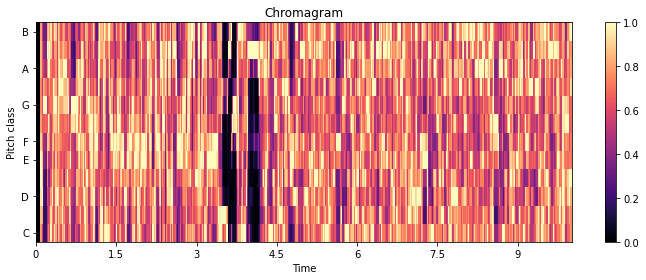

In [10]:
# gunshot chroma_sfft
chroma = df['chroma_stft'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

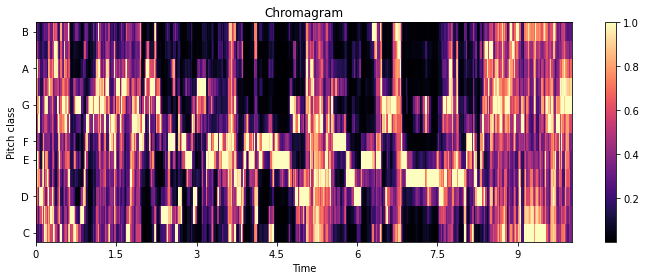

In [11]:
# non gunshot chroma_sfft
chroma = df['chroma_stft'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

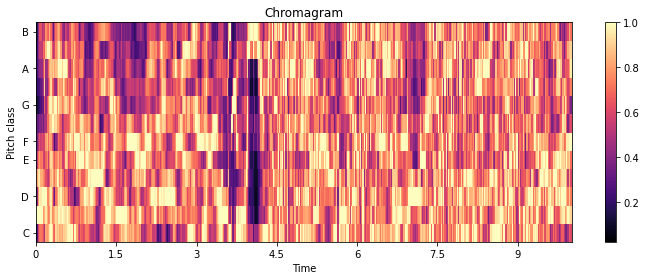

In [12]:
# gunshot chroma_cqt
chroma = df['chroma_cqt'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

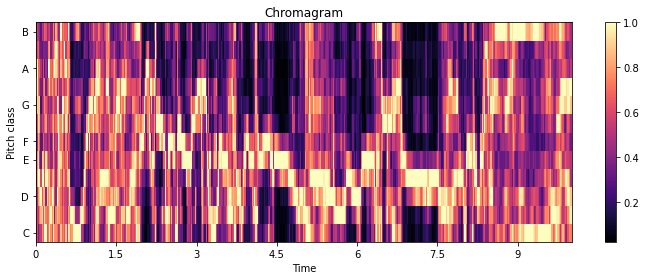

In [13]:
# non gunshot chroma_cqt
chroma = df['chroma_cqt'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

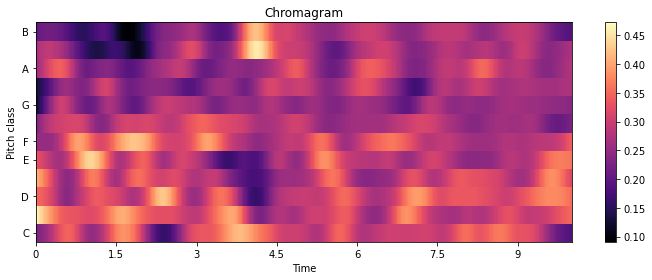

In [14]:
# gunshot chroma_cens
chroma = df['chroma_cens'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

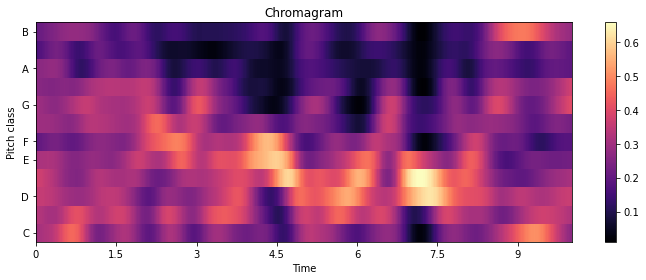

In [15]:
# non gunshot chroma_cens
chroma = df['chroma_cens'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

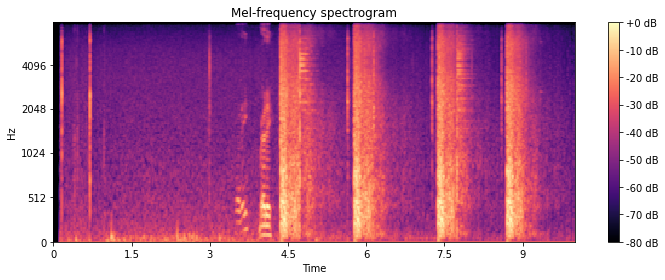

In [16]:
# gunshot melspectrogram
plt.figure(figsize=(10, 4))
S = df['melspectrogram'][0]
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

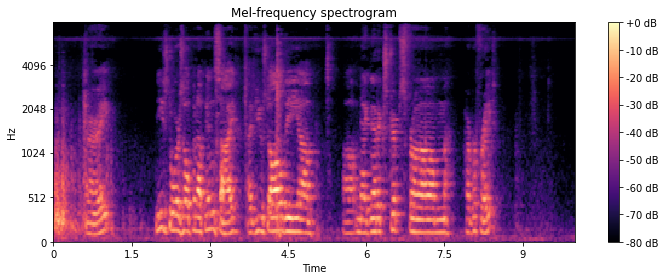

In [17]:
# non gunshot melspectrogram
plt.figure(figsize=(10, 4))
S = df['melspectrogram'][1]
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

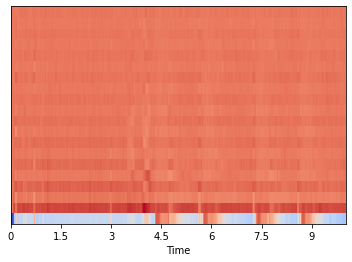

In [18]:
# gunshot mfcc
# view_spectral_centroid(df['mfcc'][0][0])
librosa.display.specshow(df['mfcc'][0], x_axis='time')

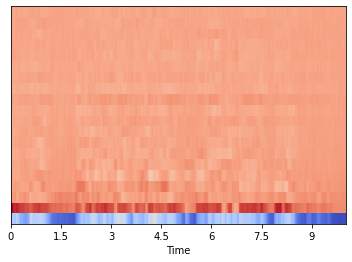

In [19]:
# non gunshot mfcc
# view_spectral_centroid(df['mfcc'][1][0])
librosa.display.specshow(df['mfcc'][1], x_axis='time')

range(0, 431)
[0.         0.02321995 0.04643991 0.06965986 0.09287982 0.11609977
 0.13931973 0.16253968 0.18575964 0.20897959 0.23219955 0.2554195
 0.27863946 0.30185941 0.32507937 0.34829932 0.37151927 0.39473923
 0.41795918 0.44117914 0.46439909 0.48761905 0.510839   0.53405896
 0.55727891 0.58049887 0.60371882 0.62693878 0.65015873 0.67337868
 0.69659864 0.71981859 0.74303855 0.7662585  0.78947846 0.81269841
 0.83591837 0.85913832 0.88235828 0.90557823 0.92879819 0.95201814
 0.9752381  0.99845805 1.021678   1.04489796 1.06811791 1.09133787
 1.11455782 1.13777778 1.16099773 1.18421769 1.20743764 1.2306576
 1.25387755 1.27709751 1.30031746 1.32353741 1.34675737 1.36997732
 1.39319728 1.41641723 1.43963719 1.46285714 1.4860771  1.50929705
 1.53251701 1.55573696 1.57895692 1.60217687 1.62539683 1.64861678
 1.67183673 1.69505669 1.71827664 1.7414966  1.76471655 1.78793651
 1.81115646 1.83437642 1.85759637 1.88081633 1.90403628 1.92725624
 1.95047619 1.97369615 1.9969161  2.02013605 2.043

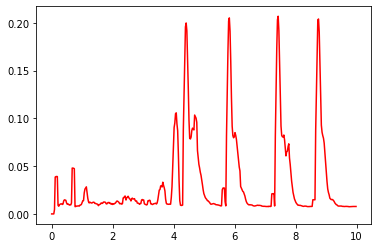

In [36]:
# gunshot rms
rms = df['rms'][0]
plot_feature(df['rms'][0][0])

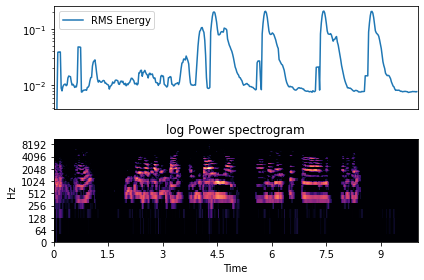

In [21]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

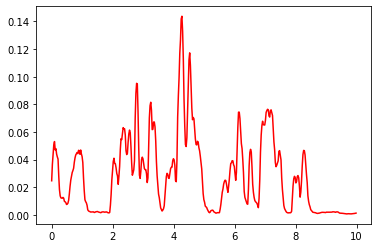

In [22]:
# non gunshot rms
rms = df['rms'][1]
plot_feature(df['rms'][1][0])

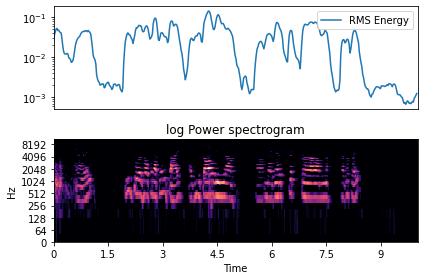

In [23]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

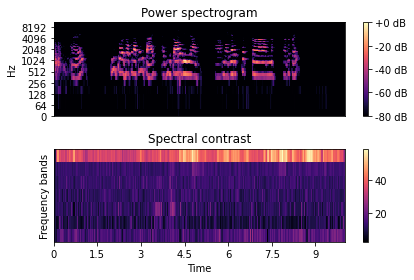

In [24]:
# gunshot spectral_contrast
contrast = df['spectral_contrast'][0]
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

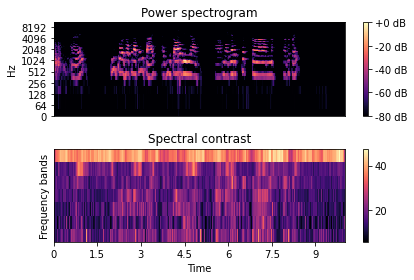

In [25]:
# non gunshot spectral_contrast

contrast = df['spectral_contrast'][1]
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

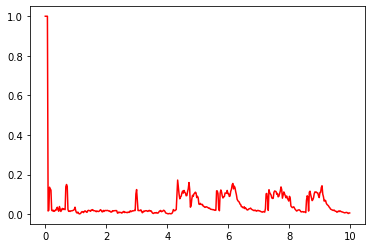

In [26]:
# gunshot spectral_flatness
plot_feature(df['spectral_flatness'][0][0])

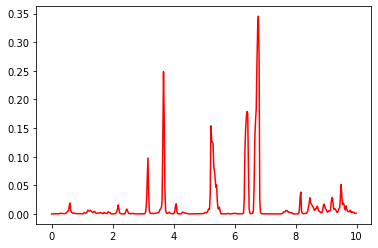

In [27]:
# non gunshot spectral_flatness
plot_feature(df['spectral_flatness'][1][0])

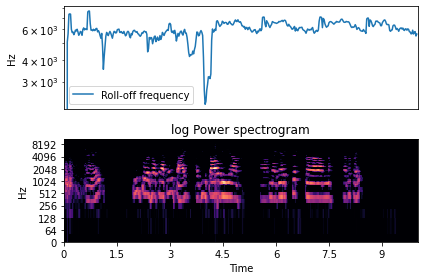

In [28]:
# gunshot spectral_rolloff
rolloff = df['spectral_rolloff'][0]

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

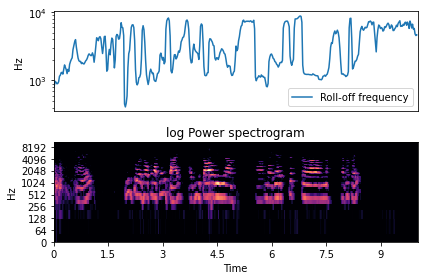

In [29]:
# non gunshot spectral_rolloff
rolloff = df['spectral_rolloff'][1]

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

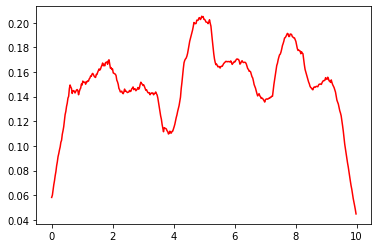

In [30]:
# gunshot zero_crossing_rate
plot_feature(df['zero_crossing_rate'][0][0])

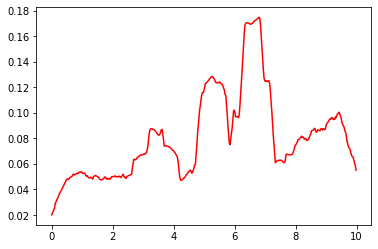

In [31]:
# non gunshot zero_crossing_rate
plot_feature(df['zero_crossing_rate'][1][0])

In [32]:
print('chroma_stft')
print('number of elements per subarray', df['chroma_stft'][0][0].size)
print('total number of elements', df['chroma_stft'][0].size)
print("number of subarrays", len(df['chroma_stft'][0]), '\n')

print('chroma_cqt')
print('number of elements per subarray', df['chroma_cqt'][0][0].size)
print('total number of elements', df['chroma_cqt'][0].size)
print("number of subarrays", len(df['chroma_cqt'][0]), '\n')

print('chroma_cens')
print('number of elements per subarray', df['chroma_cens'][0][0].size)
print('total number of elements', df['chroma_cens'][0].size)
print("number of subarrays", len(df['chroma_cens'][0]), '\n')

print('melspectrogram')
print('number of elements per subarray', df['melspectrogram'][0][0].size)
print('total number of elements', df['melspectrogram'][0].size)
print("number of subarrays", len(df['melspectrogram'][0]), '\n')

print('mfcc')
print('number of elements per subarray', df['mfcc'][0][0].size)
print('total number of elements', df['mfcc'][0].size)
print("number of subarrays", len(df['mfcc'][0]), '\n')

print('rms')
print('number of elements per subarray', df['rms'][0][0].size)
print('total number of elements', df['rms'][0].size)
print("number of subarrays", len(df['rms'][0]), '\n')

print('spectral_centroid')
print('number of elements per subarray', df['spectral_centroid'][0][0].size)
print('total number of elements', df['spectral_centroid'][0].size)
print("number of subarrays", len(df['spectral_centroid'][0]), '\n')

print('spectral_bandwidth')
print('number of elements per subarray', df['spectral_bandwidth'][0][0].size)
print('total number of elements', df['spectral_bandwidth'][0].size)
print("number of subarrays", len(df['spectral_bandwidth'][0]), '\n')

print('spectral_contrast')
print('number of elements per subarray', df['spectral_contrast'][0][0].size)
print('total number of elements', df['spectral_contrast'][0].size)
print("number of subarrays", len(df['spectral_contrast'][0]), '\n')

print('spectral_flatness')
print('number of elements per subarray', df['spectral_flatness'][0][0].size)
print('total number of elements', df['spectral_flatness'][0].size)
print("number of subarrays", len(df['spectral_flatness'][0]), '\n')

print('spectral_rolloff')
print('number of elements per subarray', df['spectral_rolloff'][0][0].size)
print('total number of elements', df['spectral_rolloff'][0].size)
print("number of subarrays", len(df['spectral_rolloff'][0]), '\n')

print('poly_features')
print('number of elements per subarray', df['poly_features'][0][0].size)
print('total number of elements', df['poly_features'][0].size)
print("number of subarrays", len(df['poly_features'][0]), '\n')

print('tonnetz')
print('number of elements per subarray', df['tonnetz'][0][0].size)
print('total number of elements', df['tonnetz'][0].size)
print("number of subarrays", len(df['tonnetz'][0]), '\n')

print('zero_crossing_rate')
print('number of elements per subarray', df['zero_crossing_rate'][0][0].size)
print('total number of elements', df['zero_crossing_rate'][0].size)
print("number of subarrays", len(df['zero_crossing_rate'][0]), '\n')

chroma_stft
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cqt
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cens
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

melspectrogram
number of elements per subarray 431
total number of elements 55168
number of subarrays 128 

mfcc
number of elements per subarray 431
total number of elements 8620
number of subarrays 20 

rms
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_centroid
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_bandwidth
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_contrast
number of elements per subarray 431
total number of elements 3017
number of subarrays 7 

spectral_flatness
number of elements per subarray 431
total number of el